In [1]:
print("Hellow world")

Hellow world


In [2]:
print("Hello world")

Hello world


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 48.8 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 144.1 MB/s  0:00:00
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=17ed378f797c2a5da6afa9554de48639e84af4fdafaf6ffbd1d943cf78474cec
  Stored in directory: /tmp/wsuser/.ca

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [11]:
import yfinance as yf 
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
print(tesla_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-10-22 00:00:00-04:00  217.309998  218.220001  215.259995  217.970001   
2024-10-23 00:00:00-04:00  217.130005  218.720001  212.110001  213.649994   
2024-10-24 00:00:00-04:00  244.679993  262.119995  242.649994  260.480011   
2024-10-25 00:00:00-04:00  256.010010  269.489990  255.320007  269.190002   
2024-10-28 00:00:00-04:00  270.000000  273.540009  262.239990  262.510010   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-10-22 00:00:00-04:00   43268700        0.0           0.0  
2024-10-23 00:00:00-04:00   80938900        0.0           0.0  
2024-10-24 00:00:00-04:00  204491900        0.0           0.0  
2024-10-25 00:00:00-04:00  161611900        0.0           0.0  
2024-10-28 00:00:00-04:00  107653600        0.0           0.0  


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0 Safari/537.36"
}
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")
table = soup.find_all("table")[0]
tesla_revenue = pd.read_html(str(table))[0]
print(tesla_revenue.head())


   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  


In [15]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
print(gme_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2024-10-22 00:00:00-04:00  20.620001  20.940001  20.430000  20.930000   
2024-10-23 00:00:00-04:00  20.730000  20.980000  20.350000  20.540001   
2024-10-24 00:00:00-04:00  20.629999  20.840000  20.480000  20.629999   
2024-10-25 00:00:00-04:00  20.650000  21.430000  20.540001  20.570000   
2024-10-28 00:00:00-04:00  20.840000  22.770000  20.730000  22.730000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-10-22 00:00:00-04:00   3232300        0.0           0.0  
2024-10-23 00:00:00-04:00   2945000        0.0           0.0  
2024-10-24 00:00:00-04:00   2682300        0.0           0.0  
2024-10-25 00:00:00-04:00   5989000        0.0           0.0  
2024-10-28 00:00:00-04:00  13641200        0.0           0.0  


In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = pd.read_html(html_data)

gme_revenue = tables[1]

gme_revenue.dropna(inplace=True)

print(gme_revenue.tail())


   GameStop Quarterly Revenue (Millions of US $)  \
57                                    2006-01-31   
58                                    2005-10-31   
59                                    2005-07-31   
60                                    2005-04-30   
61                                    2005-01-31   

   GameStop Quarterly Revenue (Millions of US $).1  
57                                          $1,667  
58                                            $534  
59                                            $416  
60                                            $475  
61                                            $709  


In [44]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Sample Tesla data (synthetic for illustration)
data = {
    "Date": pd.date_range(start="2012-01-01", end="2021-12-31", freq="M"),
    "Price": [i * 2 + (i % 5) * 10 for i in range(120)],      # Simulated stock prices
    "Revenue": [i * 50 + (i % 3) * 100 for i in range(120)]   # Simulated revenue values
}
df = pd.DataFrame(data)

# Create two subplots: one for price, one for revenue
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Tesla Stock Price", "Tesla Revenue"),
                    vertical_spacing=0.15)

# Add stock price line chart
fig.add_trace(go.Scatter(x=df["Date"], y=df["Price"], mode="lines", name="Price"),
              row=1, col=1)

# Add revenue line chart
fig.add_trace(go.Scatter(x=df["Date"], y=df["Revenue"], mode="lines", name="Revenue"),
              row=2, col=1)

# Customize layout with range slider
fig.update_layout(
    title="Interactive Tesla Stock & Revenue Charts (2012–2021)",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(count=3, label="3Y", step="year", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    height=700
)

fig.show()


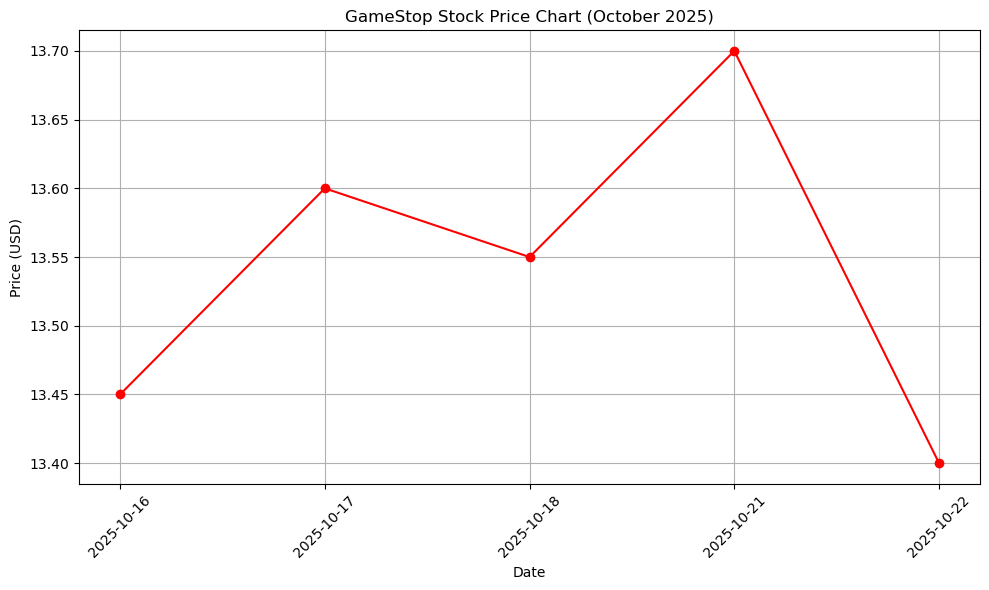

In [45]:
import matplotlib.pyplot as plt

# Sample GME stock data (replace with actual data if available)
dates = ["2025-10-16", "2025-10-17", "2025-10-18", "2025-10-21", "2025-10-22"]
prices = [13.45, 13.60, 13.55, 13.70, 13.40]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, marker='o', linestyle='-', color='red')

# Add title and labels
plt.title("GameStop Stock Price Chart (October 2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
